В данном проекте показаны навыки работы с базами данных SQL.
Датасеты представлены сервисом Яндекс. 
Проект представлен в виде задач с ответами на запросы. Код написан в текстовой ячейке, так же как и вывод результата.

1. Выгрузите таблицу, в которой будут такие поля: <br>
название компании-покупателя; <br>
сумма сделки;<br>
название компании, которую купили;<br>
сумма инвестиций, вложенных в купленную компанию;<br>
доля, которая отображает, во сколько раз сумма покупки превысила сумму вложенных в компанию инвестиций, округлённая до ближайшего целого числа.<br>
Не учитывайте те сделки, в которых сумма покупки равна нулю. Если сумма инвестиций в компанию равна нулю, исключите такую компанию из таблицы.<br>
Отсортируйте таблицу по сумме сделки от большей к меньшей, а затем по названию купленной компании в алфавитном порядке. <br>Ограничьте таблицу первыми десятью записями.

SELECT c.name AS name_acquired,<br>
        a.price_amount,<br>
        cc.name AS name_acquiring,<br><br>
        cc.funding_total,<br>
        ROUND(a.price_amount / cc.funding_total)<br>
FROM acquisition AS a<br>
JOIN company AS c ON a.acquiring_company_id = c.id<br>
JOIN company AS cc ON a.acquired_company_id = cc.id<br>
WHERE a.price_amount != 0<br>
AND cc.funding_total != 0<br>
ORDER BY a.price_amount DESC, name_acquiring<br>
LIMIT 10;

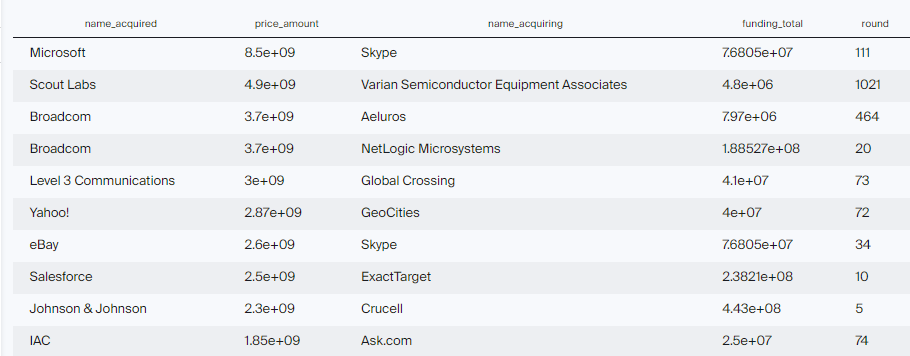

2. Отберите данные по месяцам с 2010 по 2013 год, когда проходили инвестиционные раунды. <br>
Сгруппируйте данные по номеру месяца и получите таблицу, в которой будут поля:<br>
номер месяца, в котором проходили раунды;<br>
количество уникальных названий фондов из США, которые инвестировали в этом месяце;<br>
количество компаний, купленных за этот месяц;<br>
общая сумма сделок по покупкам в этом месяце.

WITH <br>
 
    funding_2010_2013 AS  (SELECT <br>
                                 EXTRACT(MONTH FROM funded_at) AS funded_month,<br>                                                                              COUNT(DISTINCT fund.name) AS unique_funds_count<br>
                            FROM funding_round<br>
                            JOIN investment <br>
                                   ON investment.funding_round_id =  funding_round.id<br>
                            JOIN fund <br>
                                   ON investment.fund_id = fund.id<br>
                            WHERE EXTRACT(YEAR FROM funded_at) BETWEEN 2010 AND 2013  <br>
                                  AND  fund.country_code = 'USA'<br>                          
                            GROUP BY EXTRACT(MONTH FROM funded_at)<br>                         
                           ),<br>
 
    acquisition_month AS (SELECT<br> 
                               EXTRACT(MONTH FROM acquired_at) AS funded_month,<br>
                               COUNT(acquisition.acquired_company_id) AS acquired_companies_count,<br>
                               SUM(price_amount) AS total_price_amount<br>
                            FROM acquisition<br>                                
                            WHERE EXTRACT(YEAR FROM acquired_at) BETWEEN 2010 AND 2013<br>
                            GROUP BY EXTRACT(MONTH FROM acquired_at))<br>
 
 
SELECT <br>
    funding_2010_2013.funded_month,<br>
    funding_2010_2013.unique_funds_count,<br>
    acquired_companies_count,<br>
    total_price_amount<br>
FROM funding_2010_2013<br>
JOIN acquisition_month ON funding_2010_2013.funded_month = acquisition_month.funded_month 

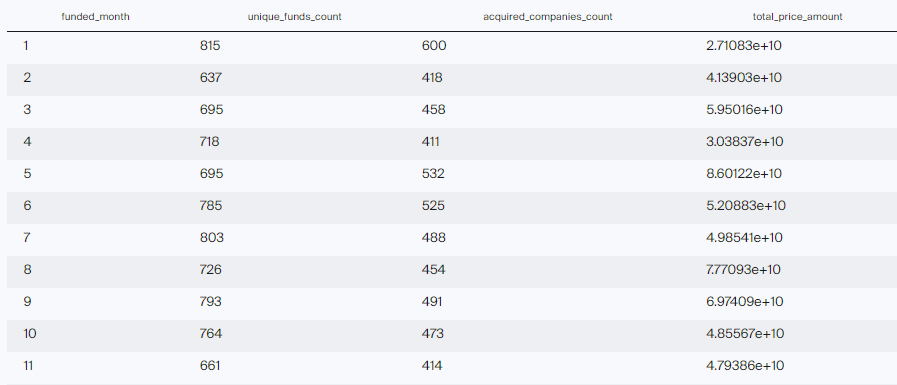

3. Составьте сводную таблицу и выведите среднюю сумму инвестиций для стран, в которых есть стартапы, зарегистрированные в 2011, 2012 и 2013 годах. Данные за каждый год должны быть в отдельном поле. Отсортируйте таблицу по среднему значению инвестиций за 2011 год от большего к меньшему.

with ts_2011 as (SELECT <br>
        country_code,<br>
        AVG(funding_total) as a<br>
FROM company<br>
WHERE extract(year from founded_at) = 2011<br>
Group by 1),<br>
ts_2012 as (<br>
SELECT <br>
        country_code,<br>
        AVG(funding_total) as a<br>
FROM company<br>
WHERE extract(year from founded_at) = 2012<br>
Group by 1<br>
),<br>
ts_2013 as(<br>
SELECT <br>
        country_code,<br><br>
        AVG(funding_total) as a<br>
FROM company<br>
WHERE extract(year from founded_at) = 2013<br>
Group by 1)<br>
SELECT ts_2011.country_code,<br>
        ts_2011.a,<br>
        ts_2012.a,<br>
        ts_2013.a<br>
FROM ts_2011 INNER JOIN ts_2012 ON ts_2011.country_code = ts_2012.country_code<br>
INNER JOIN ts_2013 ON ts_2012.country_code = ts_2013.country_code<br>
ORDER BY 2 desc

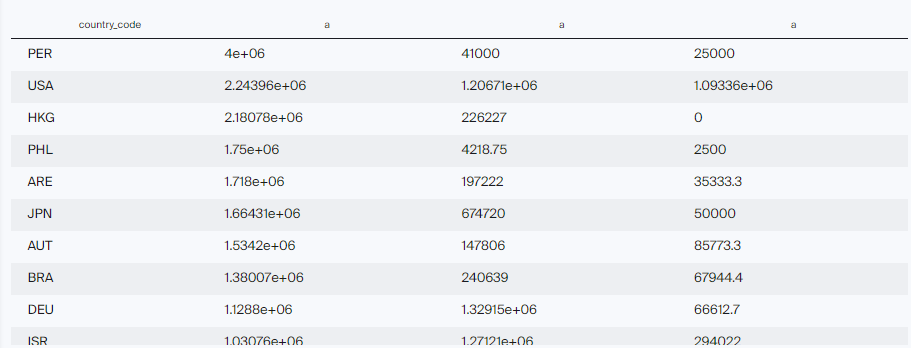